In [1]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [2]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [3]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [4]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [5]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 230kB/s 
     |████████████████████████████████| 491kB 32.3MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-linux_x86_64.whl size=2448826 sha256=abdb38cce0643084de2876f2afa4cfb1ba1e25374cae69e45059142f046199b7
  Stored in directory: /root/.cache/pip/wheels/b0/49/6a/4393ef8542c00becf80691bd242693db9e263d6e499323a984
Successfully built JPype1
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-22 17:44:18--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.

In [6]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [7]:
cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


In [0]:
import pandas as pd
train_data = pd.read_csv("model_kb_dacon02_trainset.csv")
test_data = pd.read_csv("public_test.csv")

In [0]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in range(len(test_data_text)):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data['clear_text'] = test_clear_text

In [10]:
import re

test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data['clear_text2'] = test_clear_text2
test_data

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [11]:
train_data

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
0,0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
2,2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...,...,...,...
37401,37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [12]:
import re

test_clear_text = list(test_data['clear_text2'])

test_clear_text2 = []

for text in test_clear_text:
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
# hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')  # 위와 동일
  temp = hangul.sub('', text) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
  test_clear_text2.append(temp)
test_data['clear_text3'] = test_clear_text2
test_data

,id,year_month,text,clear_text,clear_text2,clear_text3
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 창원중앙동 지점 계장입니...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...,광고알림 신청하면 매일 현금 만원 부동산 리브온지금 부동산 리브온 에서 알림 신청만...


In [13]:
import re

test_clear_text = list(train_data['clear_text2'])

test_clear_text2 = []

for text in test_clear_text:
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
# hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')  # 위와 동일
  temp = hangul.sub('', text) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
  test_clear_text2.append(temp)
train_data['clear_text3'] = test_clear_text2
train_data

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2,clear_text3
0,0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...,광고고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준과 ...
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...,시장동향 마감 기준 마감 기준 마감 기준 일본 상하이종합 마감 기준홍...
2,2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 수신거부 목...
...,...,...,...,...,...,...,...,...,...,...
37401,37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...,광고금전을 요구하는건 사기입니다 유의하세요부득이하게 높은 이자를 내고 있는 분월 불...
37402,37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요부득이하게 높은 이...
37403,37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...,광고 항상 국민은행을 이용해주셔서 감사합니다 년 월 신상품이 출시되여서 안내드립니다...
37404,37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [14]:
from konlpy.tag import Okt
from konlpy.tag import Mecab
okt = Okt()
mecab = Mecab()

/content/notebooks/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [16]:
from tqdm import tqdm
X_train = []
for i in tqdm(range(len(train_data['clear_text3']))):
  temp_X = []
  temp_X = okt.morphs(train_data['clear_text3'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 37406/37406 [37:05<00:00, 15.09it/s]


In [17]:
X_test = []
for i in tqdm(range(len(test_data['clear_text3']))):
  temp_X = []
  temp_X = okt.morphs(test_data['clear_text3'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:42<00:00, 38.52it/s]


In [18]:
print(X_train[:3])

[['광고', '고객', '들다', '언제나', '새롭다', '마음가짐', '새롭다', '준비', '상품', '자격', '기준', '심사', '기준', '완화', '되어다', '상품', '대해', '간단하다', '상품', '정보', '전달', '드리다', '수신', '희망', '않다', '경우', '에는', '거부', '라는', '답장', '주시', '수신', '거부', '목록', '등록', '시키다', '다시', '발송', '되다', '않다', '조치', '해드리다', '신청', '방법', '터치', '문자', '상담', '또는', '상담', '이라고', '답장', '보내다', '전화', '주시', '친절하다', '안전하다', '상담', '도움', '드리다', '카카오', '상담', '서비스', '시행', '친구', '추가', '상담', '신청', '이렇다', '해드리다', '시중', '은행권', '에서', '기존', '한도', '모두', '사용', '이신', '대출', '원리금', '균등', '방식', '인하다', '불입', '금액', '부담스럽다', '채무', '금액', '작다', '무겁다', '많다', '관리', '되다', '고객', '들다', '말씀드리다', '높다', '금리', '때문', '힘들다', '느끼다', '대출', '필요하다', '언제나', '고객', '들다', '에서', '든든하다', '파트너', '로서', '드리다', '상품', '특징', '거래', '없다', '진행', '가능', '시중', '은행권', '보다', '높다', '한도', '자체', '등급', '판단', '하므다', '낮다', '신용', '진행', '가능', '부채', '많다', '부채', '통합', '상품', '전환', '가능', '원리금', '균등', '방식', '이자', '입하', '만기일', '시로', '전환', '가능', '가상', '조회', '통해', '한도', '금리', '확인가능', '상품', '안내', '직장인', '전용', '신용', '상품', '한도', 

In [19]:
print(X_test[:3])

[['고객', '안녕하다', '새롭다', '시작', '행복', '가득하다', '기원', '지난주', '글로벌', '증시', '파월', '밉다', '의장', '통화정책', '대해', '완화', '태도', '변화', '보이다', '주초', '투자', '심리', '개선', '이어지다', '크다', '상승', '마감', '더불다', '밉다', '차관', '무역', '협상', '진행', '되다', '점도', '긍정', '이다', '달러', '환율', '주간', '하락', '가운데', '외국인', '투자자', '국내', '증시', '매수', '규모', '천억', '상회', '수급', '개선', '되다', '점도', '주목', '해보다', '필요', '있다', '금주', '시장', '미국', '금융', '실적', '발표', '시작', '본격', '실적', '시즌', '진입', '되다', '지난주', '애플', '삼성', '전자', '주요', '기업', '분기', '실적', '전망', '하향', '조정', '있다', '참고', '올해', '글로벌', '성장', '둔화', '조속', '에서', '기업', '감소', '추이', '관심', '있다', '살펴보다', '필요', '있다', '보이다', '후반', '에는', '브렉', '시트', '영국', '하원', '표결', '예정', '되어다', '있다', '추워지다', '날씨', '건강', '유의', '좋다', '한주', '되다', '감사하다', '은행', '송도', '센터', '올리다'], ['긴급', '안내', '은행', '가락동', '지점', '헬리', '기본', '대출', '이자', '조합', '에서', '납부', '일부', '종료', '되어다', '따라서', '월일', '부터', '매월', '중도', '대출', '이자', '계약', '께서', '직접', '납부', '되다', '방법', '안내', '자동', '이체', '등록', '은행', '영업', '본인', '방문', '신분증', '지다', '차다', '직원', '에게'

In [20]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [21]:
print(X_train[:3])

[[17, 9, 167, 932, 370, 2829, 370, 531, 1, 56, 97, 313, 97, 296, 70, 1, 132, 303, 1, 146, 462, 5, 57, 101, 32, 51, 198, 15, 222, 81, 30, 57, 15, 390, 166, 131, 241, 138, 7, 32, 202, 59, 12, 38, 709, 29, 8, 88, 8, 89, 81, 91, 40, 30, 141, 240, 8, 74, 5, 337, 8, 54, 265, 224, 33, 8, 12, 469, 59, 123, 95, 16, 117, 11, 165, 50, 282, 4, 67, 78, 46, 83, 515, 47, 306, 65, 47, 186, 1012, 44, 55, 7, 9, 167, 1474, 112, 3, 302, 1036, 1001, 4, 120, 932, 9, 167, 16, 422, 1284, 1494, 5, 1, 177, 103, 45, 21, 10, 123, 95, 24, 112, 11, 82, 14, 124, 367, 98, 31, 21, 10, 22, 44, 22, 18, 1, 39, 10, 67, 78, 46, 41, 440, 196, 329, 39, 10, 169, 96, 195, 11, 3, 431, 1, 37, 25, 541, 31, 1, 11, 35, 13, 3, 76, 56, 6, 82, 14, 139, 194, 48, 69, 53, 65, 18, 39, 1, 11, 119, 87, 228, 3, 76, 56, 6, 82, 14, 139, 194, 48, 69, 53, 101, 226, 11, 35, 3, 56, 119, 193, 9, 80, 82, 14, 48, 17], [262, 1495, 176, 97, 176, 97, 176, 97, 1170, 1592, 161, 176, 97, 520, 1536, 176, 97, 520, 205, 176, 97, 563, 428, 428, 150, 109, 320, 

In [22]:
print(X_test[:3])

[[9, 111, 370, 420, 353, 578, 455, 1453, 627, 150, 1965, 499, 1690, 1419, 132, 296, 3687, 1504, 403, 8255, 260, 502, 571, 1269, 379, 84, 176, 1232, 499, 10164, 408, 1085, 21, 7, 2672, 1076, 20, 563, 474, 1691, 174, 884, 561, 1359, 428, 150, 720, 1279, 3118, 1845, 725, 571, 7, 2672, 1574, 676, 348, 2, 1411, 262, 320, 19, 324, 745, 420, 1155, 324, 1289, 866, 7, 1453, 1680, 1539, 1140, 414, 139, 887, 324, 664, 1828, 562, 2, 506, 369, 627, 1530, 622, 4620, 16, 139, 168, 811, 147, 2, 1516, 348, 2, 403, 1925, 198, 1827, 1819, 1396, 1748, 3146, 722, 70, 2, 1656, 636, 206, 285, 170, 1285, 7, 75, 6, 2113, 181, 68], [3432, 37, 6, 4579, 58, 6745, 424, 4, 41, 5491, 16, 216, 777, 1226, 70, 642, 668, 129, 244, 413, 4, 41, 907, 154, 297, 216, 7, 38, 37, 448, 653, 166, 6, 275, 347, 255, 861, 489, 266, 153, 203, 4, 143, 4, 41, 448, 216, 143, 448, 653, 166, 1532, 273, 227, 640, 765, 928, 448, 653, 166, 448, 653, 4292, 9, 13, 666, 6, 275, 255, 4, 41, 216, 4, 41, 244, 216, 7, 439, 448, 653, 166, 2657, 818

문자의 최대 길이 : 294
문자의 평균 길이 :  154.1044217505213


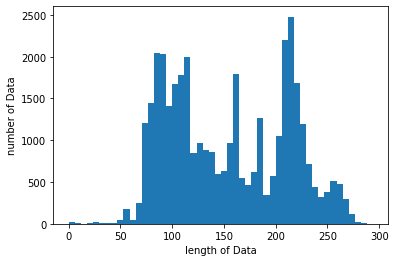

In [23]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  263
문자의 평균 길이 :  66.04551045510455


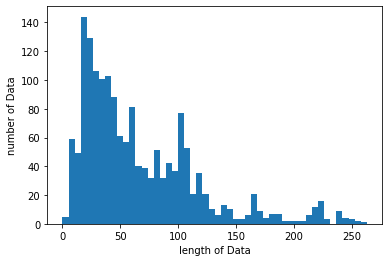

In [24]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test))
print("문자의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 294 # 전체 데이터의 길이를 380로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [0]:
import pickle

with open('tokenizer_day10_okt_only_korean_2.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
from keras.layers import Embedding, Dense, LSTM, Bidirectional
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
model3 = Sequential()
model3.add(Embedding(max_words, 100, input_length=max_len))
model3.add(Bidirectional(LSTM(128)))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/2





33665/33665 [==============================] - 960s 29ms/step - loss: 0.0347 - acc: 0.9909 - val_loss: 0.0057 - val_acc: 0.9989
Epoch 2/2
33665/33665 [==============================] - 946s 28ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0237 - val_acc: 0.9957


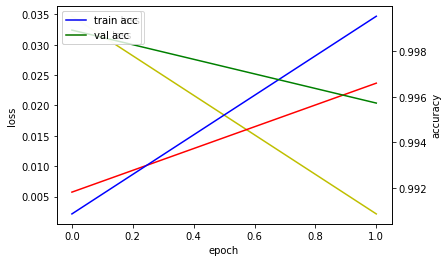

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history3.history['acc'], 'b', label='train acc')
acc_ax.plot(history3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model3.save("model_kb_dacon_day10_only_korean_1_okt.h5")

In [0]:
mypredict = model3.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_day10_onlt_korean_1_okt.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_day10_onlt_korean_1_okt.csv")

,id,smishing
0,340000,0.000008
1,340001,0.000065
2,340002,0.000012
3,340003,0.000013
4,340004,0.000007
...,...,...
1621,341621,0.000029
1622,341622,0.000011
1623,341623,0.000008
1624,341624,0.000020


In [0]:
test_data['clear_text3'].iloc[1624]

'광고알림 신청하면 매일 현금 만원 부동산 리브온지금 부동산 리브온 에서 알림 신청만 하면 매일 만원의 행운이늘 궁금한 매물시세분양 정보이방 저방보다 빠른 부동산 리브온 알림 받아보고 현금경품도 두둑이 챙겨가세요 오늘부터 매일매일 부동산 리브온에서 골든벨을 울려라 이벤트  기간  목  금  참여방법  리브온 앱 매물시세분양 중 원하는 알림 하나만 신청하면 끝  필수꿀팁  가지 알림 모두 설정 가능 알림을 많이 등록하면 당첨 확률   매일 참여도 가능 인 회 당첨  경품  현금 만원인당 매일 명 추첨  발표 및 지급  수 이내 예정부동산 리브온 이벤트 바로 참여 부동산 리브온 이벤트 자세히 보기 자세한 내용은 스마트상담부로 문의하시거나 부동산 리브온 홈페이지와 상단 링크를 참조하시기 바랍니다 본 광고물에 대한 유효기간 까지 준법감시인 심의필 제호  무료수신거부 은행부동산플랫폼부올림무료수신거부'

In [0]:
model14 = Sequential()
model14.add(Embedding(max_words, 100, input_length=max_len))
model14.add(Bidirectional(LSTM(128)))
model14.add(Dense(2, activation='sigmoid'))

model14.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history14 = model14.fit(X_train, y_train, epochs=5, batch_size=512, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/5
33665/33665 [==============================] - 502s 15ms/step - loss: 0.1962 - acc: 0.9313 - val_loss: 0.0247 - val_acc: 0.9941
Epoch 2/5
33665/33665 [==============================] - 496s 15ms/step - loss: 0.0108 - acc: 0.9981 - val_loss: 0.0241 - val_acc: 0.9955
Epoch 3/5
33665/33665 [==============================] - 494s 15ms/step - loss: 0.0065 - acc: 0.9990 - val_loss: 0.0282 - val_acc: 0.9948
Epoch 4/5
33665/33665 [==============================] - 494s 15ms/step - loss: 0.0056 - acc: 0.9993 - val_loss: 0.0243 - val_acc: 0.9957
Epoch 5/5
33665/33665 [==============================] - 493s 15ms/step - loss: 0.0323 - acc: 0.9947 - val_loss: 0.0146 - val_acc: 0.9976


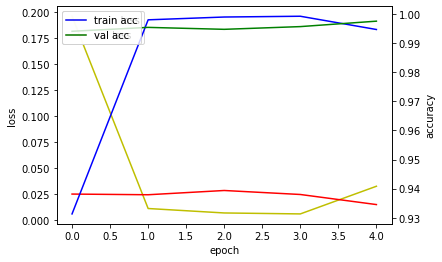

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history14.history['loss'], 'y', label='train loss')
loss_ax.plot(history14.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history14.history['acc'], 'b', label='train acc')
acc_ax.plot(history14.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model14.save("model_kb_dacon_day10_only_korean_2_okt.h5")

In [0]:
mypredict = model4.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_day10_onlt_korean_2_okt.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_day10_onlt_korean_2_okt.csv")

,id,smishing
0,340000,0.024969
1,340001,0.032028
2,340002,0.085668
3,340003,0.270898
4,340004,0.025581
...,...,...
1621,341621,0.021650
1622,341622,0.153314
1623,341623,0.113267
1624,341624,0.020724


In [0]:
model5 = Sequential()
model5.add(Embedding(max_words, 100, input_length=max_len))
model5.add(Bidirectional(LSTM(128)))
model5.add(Dense(2, activation='sigmoid'))

model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 948s 28ms/step - loss: 0.0359 - acc: 0.9900 - val_loss: 0.0254 - val_acc: 0.9955
Epoch 2/2
33665/33665 [==============================] - 928s 28ms/step - loss: 0.0056 - acc: 0.9989 - val_loss: 0.0192 - val_acc: 0.9935


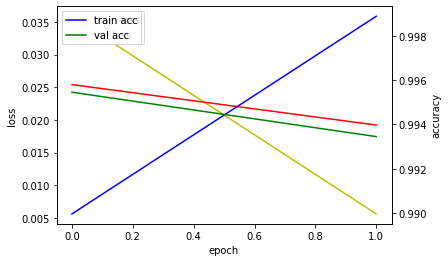

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history5.history['loss'], 'y', label='train loss')
loss_ax.plot(history5.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history5.history['acc'], 'b', label='train acc')
acc_ax.plot(history5.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model5.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_day10_onlt_korean_3_okt.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_day10_onlt_korean_3_okt.csv")

,id,smishing
0,340000,0.000003
1,340001,0.004395
2,340002,0.000003
3,340003,0.000003
4,340004,0.000004
...,...,...
1621,341621,0.000090
1622,341622,0.000003
1623,341623,0.000002
1624,341624,0.000069


In [0]:
model6 = Sequential()
model6.add(Embedding(max_words, 100))
model6.add(LSTM(128))
model6.add(Dense(2, activation='sigmoid'))

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history6 = model6.fit(X_train, y_train, epochs=4, batch_size=1024, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/4
33665/33665 [==============================] - 232s 7ms/step - loss: 0.4001 - acc: 0.9163 - val_loss: 0.0623 - val_acc: 0.9979
Epoch 2/4
33665/33665 [==============================] - 229s 7ms/step - loss: 0.0209 - acc: 0.9971 - val_loss: 0.0244 - val_acc: 0.9947
Epoch 3/4
33665/33665 [==============================] - 227s 7ms/step - loss: 0.0919 - acc: 0.9766 - val_loss: 0.2375 - val_acc: 0.9101
Epoch 4/4
33665/33665 [==============================] - 228s 7ms/step - loss: 0.0755 - acc: 0.9903 - val_loss: 0.0436 - val_acc: 0.9909


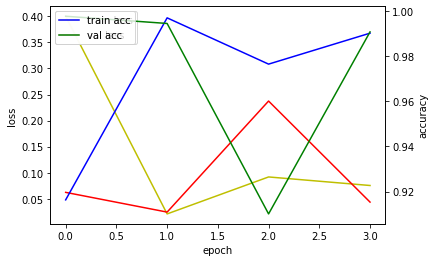

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history6.history['loss'], 'y', label='train loss')
loss_ax.plot(history6.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history6.history['acc'], 'b', label='train acc')
acc_ax.plot(history6.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model6.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_22_10.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_22_10.csv")

,id,smishing
0,340000,0.001045
1,340001,0.018275
2,340002,0.001407
3,340003,0.001455
4,340004,0.001072
...,...,...
1621,341621,0.001797
1622,341622,0.001863
1623,341623,0.001169
1624,341624,0.001498


In [0]:
model7 = Sequential()
model7.add(Embedding(max_words, 100))
model7.add(LSTM(128))
model7.add(Dense(2, activation='sigmoid'))

model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, epochs=5, batch_size=2048, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/5
33665/33665 [==============================] - 237s 7ms/step - loss: 0.6033 - acc: 0.7331 - val_loss: 0.4503 - val_acc: 0.9905
Epoch 2/5
33665/33665 [==============================] - 223s 7ms/step - loss: 0.2518 - acc: 0.9970 - val_loss: 0.0629 - val_acc: 0.9960
Epoch 3/5
33665/33665 [==============================] - 223s 7ms/step - loss: 0.0298 - acc: 0.9956 - val_loss: 0.0283 - val_acc: 0.9936
Epoch 4/5
33665/33665 [==============================] - 221s 7ms/step - loss: 0.0123 - acc: 0.9979 - val_loss: 0.0160 - val_acc: 0.9963
Epoch 5/5
33665/33665 [==============================] - 222s 7ms/step - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0153 - val_acc: 0.9963


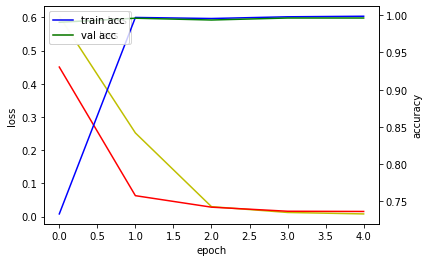

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history7.history['loss'], 'y', label='train loss')
loss_ax.plot(history7.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history7.history['acc'], 'b', label='train acc')
acc_ax.plot(history7.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model7.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_23_1.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_23_1.csv")

,id,smishing
0,340000,0.003039
1,340001,0.023893
2,340002,0.003616
3,340003,0.004975
4,340004,0.003361
...,...,...
1621,341621,0.003997
1622,341622,0.004654
1623,341623,0.003983
1624,341624,0.003516


In [30]:
model13 = Sequential()
model13.add(Embedding(max_words, 100, input_length=max_len))
model13.add(Bidirectional(LSTM(128)))
model13.add(Dense(2, activation='sigmoid'))

model13.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history13 = model13.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/1





33665/33665 [==============================] - 929s 28ms/step - loss: 0.0324 - acc: 0.9900 - val_loss: 0.0108 - val_acc: 0.9968


In [0]:
model13.save("kb_model_okt_only_korean_day10.h5")

In [32]:
mypredict = model13.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_day10_okt_only_kor_1.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_day10_okt_only_kor_1.csv")

,id,smishing
0,340000,0.000160
1,340001,0.007723
2,340002,0.000119
3,340003,0.000157
4,340004,0.000151
...,...,...
1621,341621,0.001035
1622,341622,0.000191
1623,341623,0.000098
1624,341624,0.000606


In [33]:
model14 = Sequential()
model14.add(Embedding(max_words, 100, input_length=max_len))
model14.add(Bidirectional(LSTM(64)))
model14.add(Dense(2, activation='sigmoid'))

model14.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history14 = model14.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 581s 17ms/step - loss: 0.0298 - acc: 0.9929 - val_loss: 0.0116 - val_acc: 0.9965
Epoch 2/2
33665/33665 [==============================] - 570s 17ms/step - loss: 0.0030 - acc: 0.9993 - val_loss: 0.0102 - val_acc: 0.9973


In [0]:
model14.save("kb_model_okt_only_korean_day10_2.h5")

In [35]:
mypredict = model14.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_day10_okt_only_kor_2.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_day10_okt_only_kor_2.csv")

,id,smishing
0,340000,0.000173
1,340001,0.034101
2,340002,0.000160
3,340003,0.000172
4,340004,0.000154
...,...,...
1621,341621,0.000354
1622,341622,0.000327
1623,341623,0.000120
1624,341624,0.000074


In [36]:
model23 = Sequential()
model23.add(Embedding(max_words, 100, input_length=max_len))
model23.add(Bidirectional(LSTM(128)))
model23.add(Dense(2, activation='sigmoid'))

model23.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history23 = model23.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/1
33665/33665 [==============================] - 936s 28ms/step - loss: 0.0559 - acc: 0.9773 - val_loss: 0.0188 - val_acc: 0.9952


In [0]:
model23.save("kb_model_okt_only_korean_day10_3.h5")

In [38]:
mypredict = model23.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_day10_okt_only_kor_3.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_day10_okt_only_kor_3.csv")

,id,smishing
0,340000,0.001208
1,340001,0.043196
2,340002,0.001419
3,340003,0.000966
4,340004,0.001149
...,...,...
1621,341621,0.002578
1622,341622,0.001469
1623,341623,0.000880
1624,341624,0.001394


In [1]:
model24 = Sequential()
model24.add(Embedding(max_words, 100, input_length=max_len))
model24.add(Bidirectional(LSTM(128)))
model24.add(Dense(2, activation='sigmoid'))

model24.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history24 = model24.fit(X_train, y_train, epochs=10, batch_size=4096, validation_split=0.1)

NameError: ignored